<a href="https://colab.research.google.com/github/Sercan-dev/fb_exploratory_data_analysis/blob/main/FB_ADS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis for Facebook Ads (Conversion Optimization)


Data source : https://www.kaggle.com/loveall/clicks-conversion-tracking

As Facebook users interact with the platform, adding demographic information, liking particular pages and commenting on specific posts, Facebook builds a profile of that user based on who they are and what they're interested in. Advertisers can create Facebook adverts, then create an 'Audience' for that advert or group of adverts. Audiences can be built from a range of attributes including gender, age, location and interests. This specific targetting means advertisers can tailor content appropriately for a specific audience, even if the product being marketed is the same.

For the current stage, we wants to generate more profit instead of building brand awareness. We hired advertising agency: x, y, z. They lauched campaignes seperately.We want to compare the performance of these 3 campaigns.

Explaination of each column in the dataset: 1.) ad_id: unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

5.) Impressions: the number of times the ad was shown.

6.) Clicks: number of clicks on for that ad.

7.) Spent: Amount paid by company xyz to Facebook, to show that ad.

Business questions 1.) what's the perfect target demographics ? 2.) how can we optimize existing campaigns? 3.) which campaign should we choose?


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv('/content/fb_campaign.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [8]:
# modify datatype of several columns 
df['interest']=df['interest'].astype('int64')
df['Spent']= df['Spent'].astype('int64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ad_id                1143 non-null   int64 
 1   xyz_campaign_id      1143 non-null   int64 
 2   fb_campaign_id       1143 non-null   int64 
 3   age                  1143 non-null   object
 4   gender               1143 non-null   object
 5   interest             1143 non-null   int64 
 6   Impressions          1143 non-null   int64 
 7   Clicks               1143 non-null   int64 
 8   Spent                1143 non-null   int64 
 9   Total_Conversion     1143 non-null   int64 
 10  Approved_Conversion  1143 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 98.4+ KB


In [11]:
#df.age.unique()
#df.gender.unique()
#df.interest.unique()
#df.xyz_campaign_id()
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   234
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [12]:
# drop "fb_campaign_id" column, which won't be used in the analysis
df = df.drop('fb_campaign_id',axis=1)

In [13]:
# df new indicators as columns
df['CPM']= df['Spent']/df['Impressions']*1000
df['CPC']= df['Spent']/df['Clicks']
df['CPA']= df['Spent']/df['Total_Conversion']
df['CTR(%)']= (df['Clicks']/df['Impressions'])*100
df['CVR(%)']= (df['Approved_Conversion']/df['Total_Conversion'])*100

#supposing each Approved_Conversion worth 100 $
df['revenue']=df['Approved_Conversion']*100
df['profit']= df.revenue-df.Spent

In [14]:
# replace xyz_campaign id with campaign name
c = {916: 'x', 936: 'y',1178:'z'}
df['ID'] = df['xyz_campaign_id'].map(c)

In [15]:
df.sample(5)

,ad_id,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPM,CPC,CPA,CTR(%),CVR(%),revenue,profit,ID
158,747332,936,30-34,M,64,792,0,0,1,1,0.000000,NaN,0.000000,0.000000,100.0,100,100,y
1081,1314343,1178,45-49,M,102,134245,18,25,2,1,0.186227,1.388889,12.500000,0.013408,50.0,100,75,z
291,777794,936,30-34,M,18,13473,3,2,3,0,0.148445,0.666667,0.666667,0.022267,0.0,0,-2,y
538,1121117,1178,30-34,M,19,98759,15,26,1,1,0.263267,1.733333,26.000000,0.015188,100.0,100,74,z
367,780759,936,45-49,F,18,2912,0,0,1,0,0.000000,NaN,0.000000,0.000000,0.0,0,0,y


In [28]:
# create new dataframe that only contain numbers for correlation analysis
columns_num= df[['revenue','Impressions','Clicks', 'Total_Conversion', 'Spent', 'interest','gender']]

Text(0.5, 1.05, 'Overview of relathionships between numerical features')

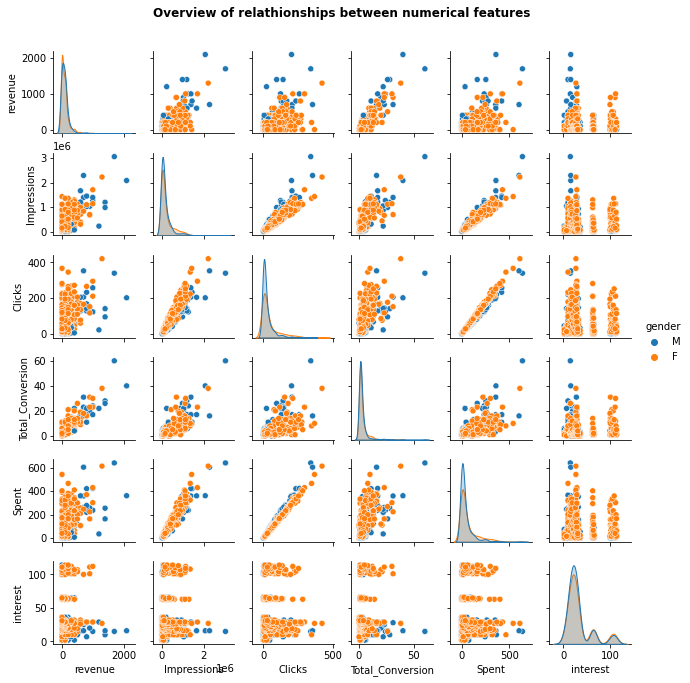

In [31]:
# pairplot positive correlations
sns.pairplot(columns_num,height=1.5, hue='gender')
plt.suptitle("Overview of relathionships between numerical features", y=1.05,weight='bold')

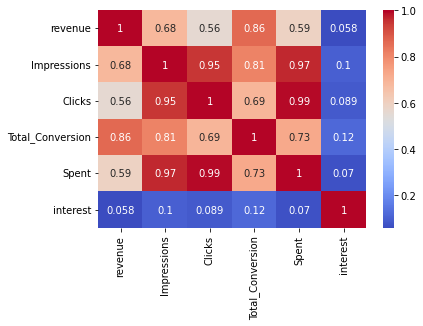

In [34]:
sns.heatmap(columns_num.corr(),annot=True,cmap='coolwarm')

"Total_conversion" and "impression" are more related to core indicator "revenue" than "spent" and "click".

# **Bivariate Analysis**

# Performance by Campaign

Text(0.5, 0.98, 'Performance by Campaign')

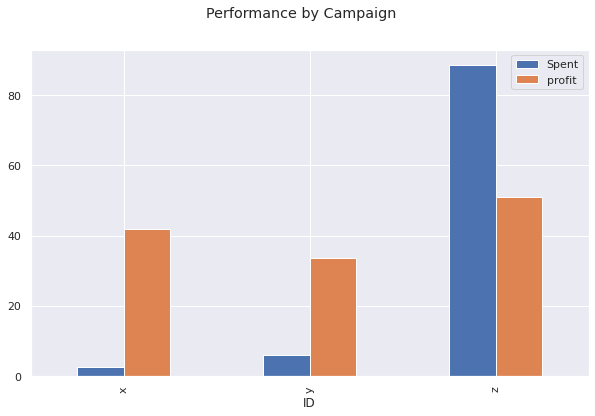

In [46]:
campaign = pd.pivot_table(data=df,index='ID',values=['Spent','profit'],aggfunc='mean',margins=False).round(3)
plt.rcParams['figure.figsize']=(10,6)
campaign.plot(kind='bar')
plt.suptitle("Performance by Campaign")

Campaign_z has delivered highest profits with greatest advertising volumes via high advertising expenditure.

Although Campaign x spends less, it brings higher ROAS with similar average revenue.

Campaign_x and Campaign_y have higher potential.

Text(0.5, 0.98, 'Profit by age in Campaign_x')

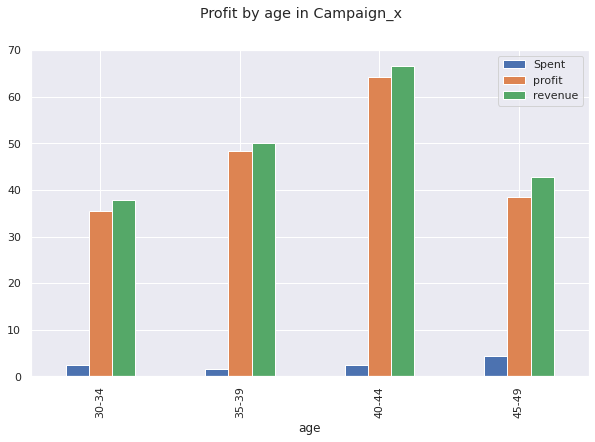

In [43]:
# which age group is attracted and willing to pay?
plt.rcParams['figure.figsize']=(10,6)
a = pd.pivot_table(data=df.loc[df['ID'] == 'x'], index='age',values=['Spent','revenue','profit'], aggfunc='mean').plot(kind='bar')

plt.suptitle("Profit by age in Campaign_x")

Text(0.5, 0.98, 'Profit by age in Campaign_y')

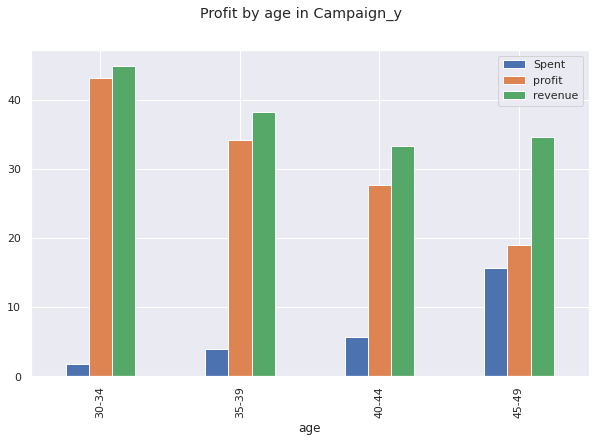

In [47]:
# which age group is attracted and willing to pay?
plt.rcParams['figure.figsize']=(10,6)
a = pd.pivot_table(data=df.loc[df['ID'] == 'y'], index='age',values=['Spent','revenue','profit'], aggfunc='mean').plot(kind='bar')

plt.suptitle("Profit by age in Campaign_y")

Campaign_x spends brings higher ROAS in age group 40-44.

Campaign_x spends brings higher ROAS in age group 30-34.


# Further analyzing of demographics

Text(0.5, 0.98, 'CTR by age')

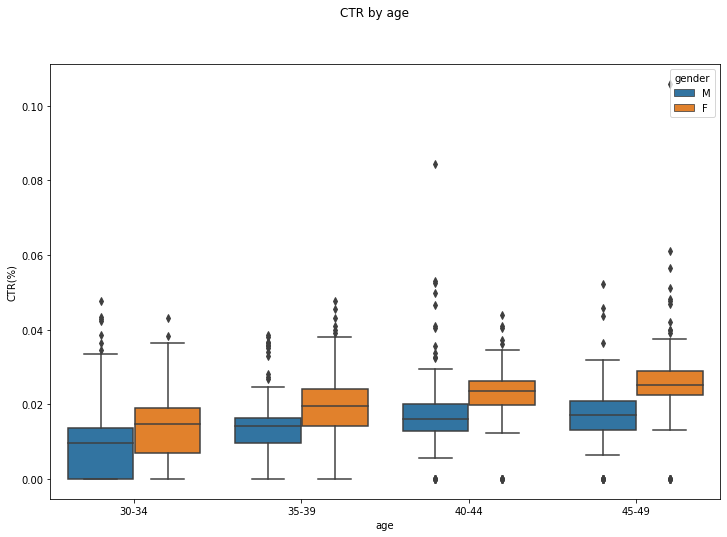

In [36]:
# Click through rate(CTR) by age
plt.figure(figsize=(12,8))
sns.boxplot(x=df.age,y=df['CTR(%)'],hue=df.gender)
plt.suptitle("CTR by age")

Text(0.5, 0.98, 'Profit by age')

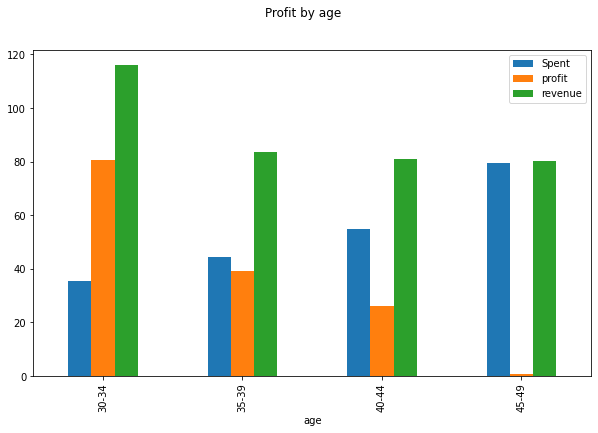

In [35]:
# which age group is attracted and willing to pay most likely?
plt.rcParams['figure.figsize']=(10,6)
a = pd.pivot_table(data=df, index='age',values=['Spent','revenue','profit'], aggfunc='mean').plot(kind='bar')

plt.suptitle("Profit by age")



There was little difference in the level of interest in the Ad

creative (measured by CTR ) for each gender in each age group.

-Age group 30-34 is our key target audience. They bring the highest ROAS.

-Although the exposure and cost on Group 45-49 are high, this group is not willing to pay for the product. There may be potential problems, such as imprecise interest targeting.

-The age groups from 40-49 click more frequently on Ads. Higher clicks do not necessarily indicate a higher interest in the product. but may also be due to the fact that older people don't distinguish well between sponsored content（advertising) and feeds.

-Meanwhile, older groups are more cautious about online payments, so they seem hesitant to purchase. These two hypotheses may answer why profits fall as customers age.

( For further proof would require more behavior & investigation data. I will not expand on this here.)

-Generally profit fall as customers age.


Text(0.5, 0.98, 'CTR by gender')

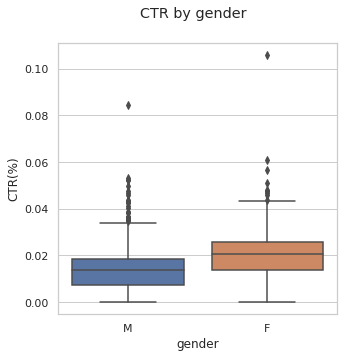

In [37]:
# interest (measured by CTR) by gender
plt.figure(figsize=(5,5))

sns.set(style='whitegrid')
sns.boxplot(data=df,x='gender',y='CTR(%)')
plt.suptitle("CTR by gender")

Women show higher interest in our ads（more clicks）, but they convert less.

Text(0.5, 0.98, 'Profit by gender')

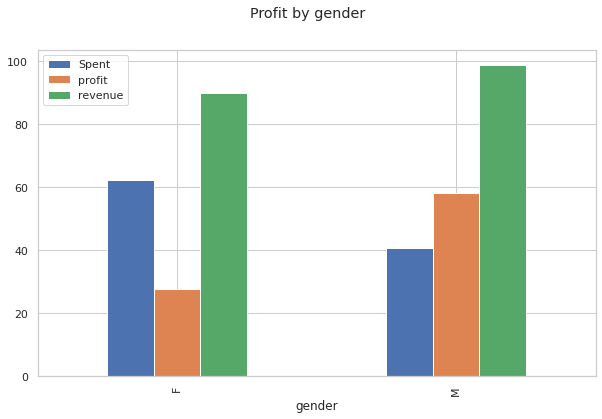

In [38]:
# which age group is willing to pay?

a = pd.pivot_table(data=df, index='gender',values=['Spent','revenue','profit'], aggfunc='mean').plot(kind='bar')

plt.suptitle("Profit by gender")

Generally speaking, Ad investment in men brings higher profit.

There is a need to analyze this further. Gender is an over-generalized classification. We need to refine to interest and age groups to see the characteristics of our core users.

# CTR by gender & interest

Text(0.5, 0.98, 'CTR by gender & interest')

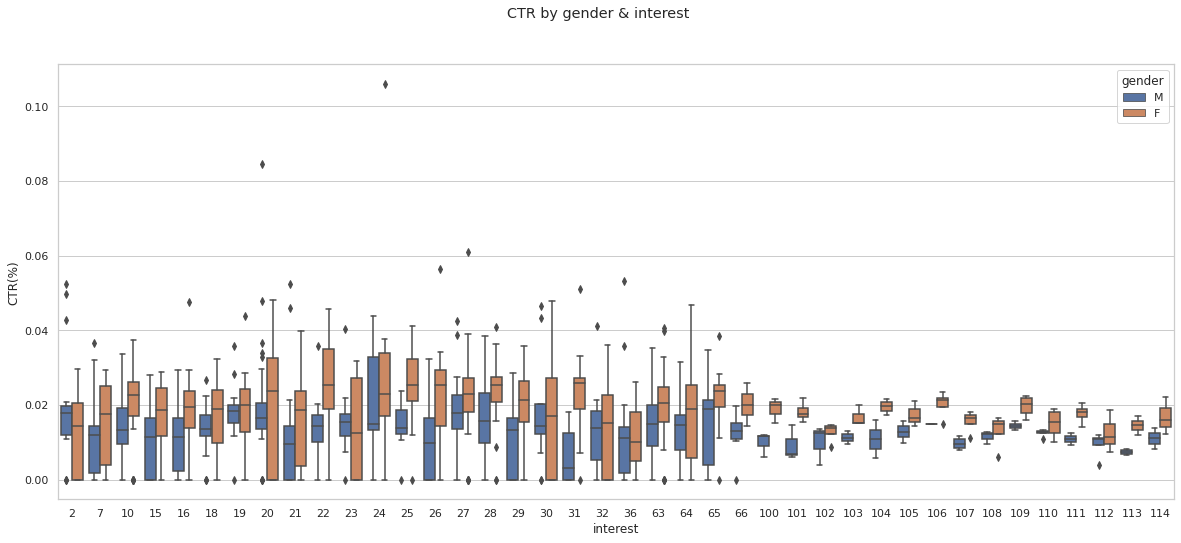

In [39]:
# interest level (measured by CTR) by audience inerests & gender
plt.figure(figsize=(20,8))
sns.boxplot(x=df.interest,y=df['CTR(%)'],hue=df.gender)

plt.suptitle("CTR by gender & interest")

Text(0.5, 0.98, 'Profit by gender & interest')

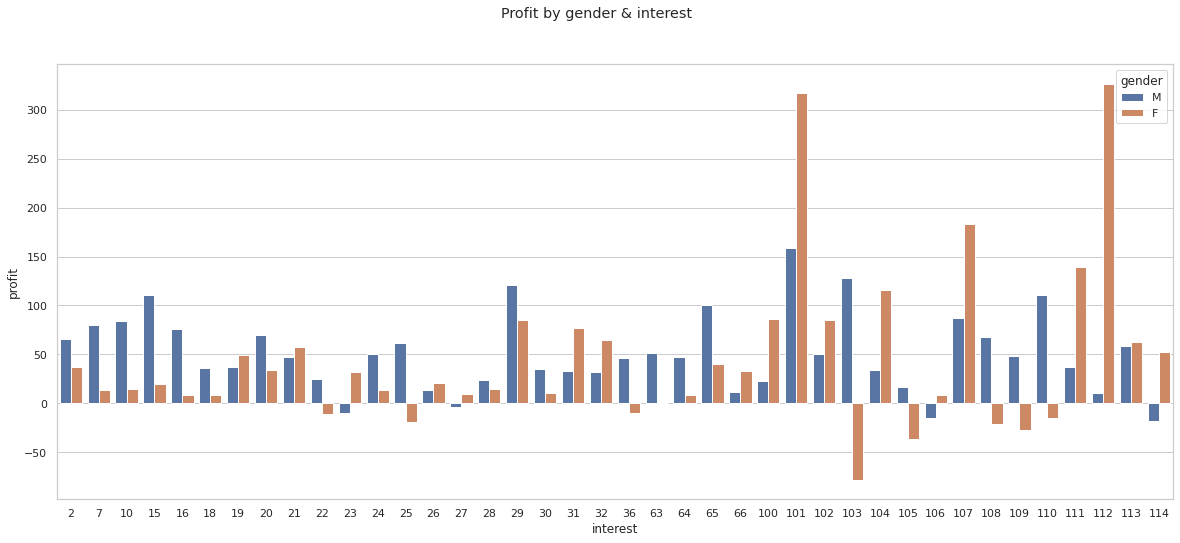

In [40]:
# which interest group+ gender is willing to pay?

plt.figure(figsize=(20,8))
sns.barplot(x=df.interest,y=df['profit'],hue=df.gender,ci=None)

plt.suptitle("Profit by gender & interest")

# Observation:

Women in interest groups from 100,101,104,107,112 are our precise target. They are almost equally highly interested in our products and are willing to pay.
Because the interest level is concentrated, we'd better try highly customized creatives for these dedicated groups to generate higher revenue.

Interest groups to be excluded from targeting list (those have high/dispersed interest level & generate low revenue): group 22,23, 27, 105,106.

It's a good strategy to combine the gender and interests when targeting at specific interest group:

Interest groups where we can target men only are: 2, 7,10,15,16,25,36,63,64,65,103,108,109,110

Interest groups where we can target women only: 31,104,111,112,114

# Audience-Interests & Age

Text(0.5, 0.98, 'Profit by age & interest')

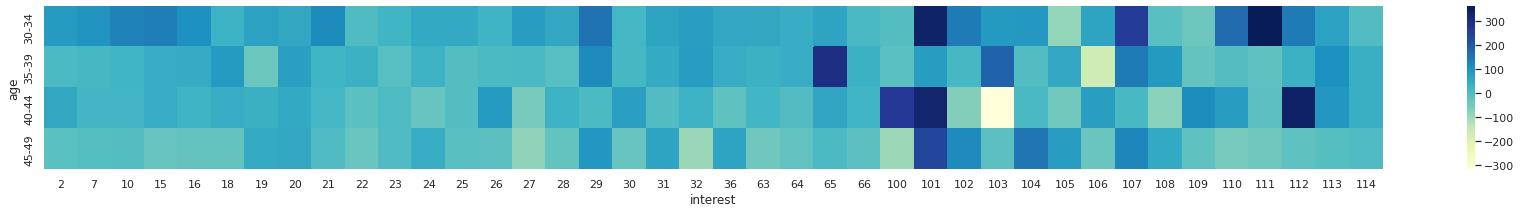

<Figure size 1440x576 with 0 Axes>

In [41]:
# Profits heatmap for interest + age
ia= pd.pivot_table(data=df,index='interest',columns='age',values='profit',aggfunc="mean",fill_value=0   )

sns.set(rc={'figure.figsize':(30,3)})
sns.heatmap(ia.T,cmap="YlGnBu");
plt.figure(figsize=(20,8))
plt.suptitle("Profit by age & interest")

On the heat map above, darker means higher average profit. Obviously, combining age and interest groups is another direction for optimization.
We need to overturn our old impressions of age groups. For example, even for the elder group like 40-44 , the profit surge in interest 112.

# Conclusion

**My recommendation for conversion optimization of the Facebook campaigns:**

---



**Target group 1**= Age group: 30-34, Interests:(101,107,111), gender:female only

**Target group 2**= Age group: 40-44, Interests:(100,101,112), gender:female only

**Target group 3**= Age group: 30-34 & 35-39, Interests:(7,10,15,16,65,103,108,110), gender:men only
